# Telecom churn analysis

* Dataset info : Sample data set containing telecom customer data and showing customers that left last month
* Also on analysing data we know that its a classification problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
teleco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
teleco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
teleco_base_data.shape

(7043, 21)

In [5]:
teleco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
teleco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
teleco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


   * here we see that SeniorCitezen is a categorical feature not numerical
   * 75% customers have tenure less than 55 months
   * Also, average monthly charges and other such useful info can be seen in the table above

In [8]:
teleco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

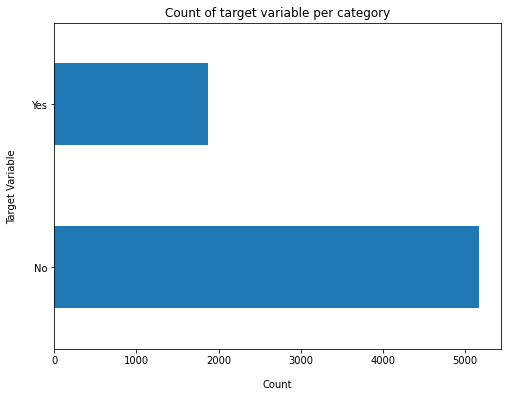

In [9]:
teleco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Variable", labelpad =14)
plt.title("Count of target variable per category");

In [10]:
100*teleco_base_data['Churn'].value_counts()/len(teleco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

So here we see that it is highly imbalanced data, ratio = 73:27
ts- 50:36

In [11]:
teleco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


no missing values, but we see that TotalCharges are of object type so we need to convert it to either int or float

In [12]:
teleco_data = teleco_base_data.copy()

In [13]:
teleco_data.TotalCharges = pd.to_numeric(teleco_data.TotalCharges, errors = 'coerce') #(error = coerce) means error will be set to nan
teleco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now we have 11 records with null values. So, lets look at them

In [14]:
teleco_data.loc[teleco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since these data records are comparitively very low as compared to total data set, we can drop them

In [15]:
teleco_data.dropna(how = 'any', inplace = True)

* now lets divide the customers into bins based on tenure

In [16]:
print(teleco_data['tenure'].max()) #getting the max tenure

72


In [17]:
#groupping the tenure in bins oof 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
teleco_data['tenure_group'] = pd.cut(teleco_data.tenure, range(1, 80, 12), right = False, labels = labels)

In [18]:
teleco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [19]:
teleco_data.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True) #dropping unwanted columns
teleco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

Plot distribution of individual predictors by churn

### Univariate analysis

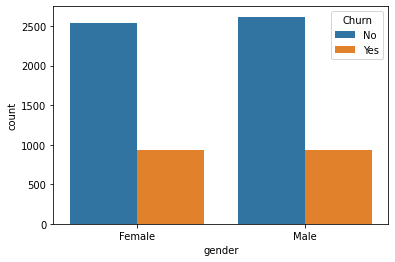

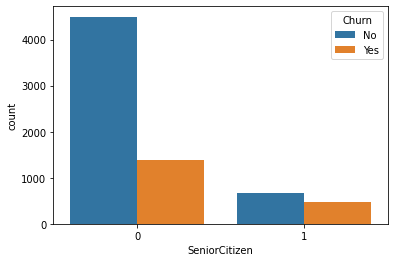

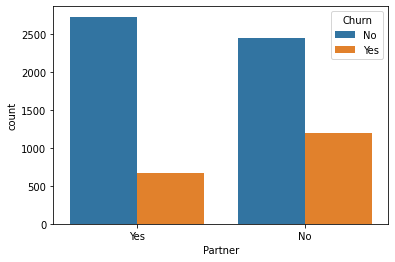

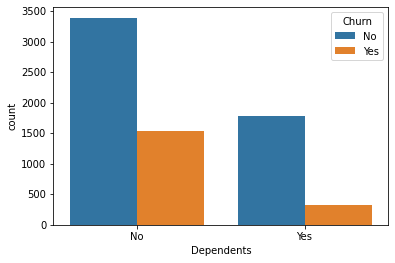

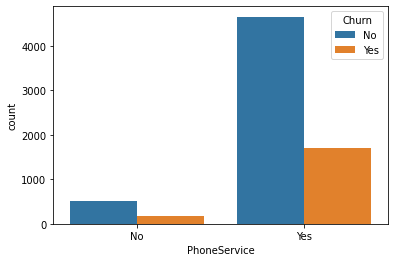

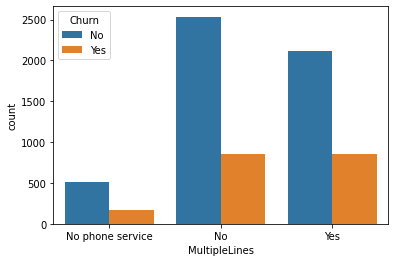

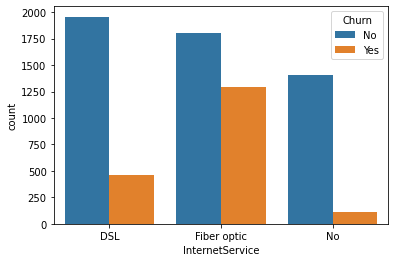

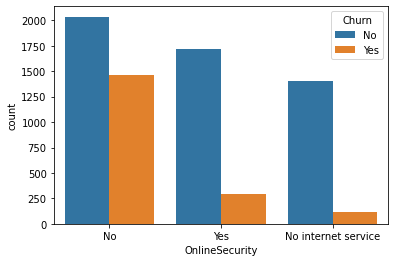

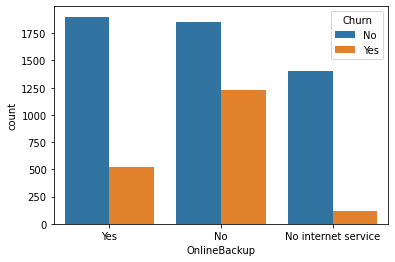

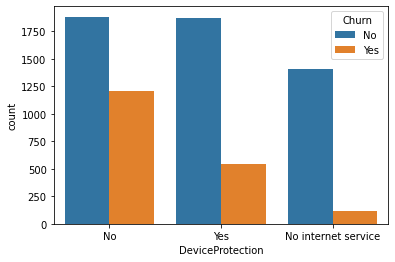

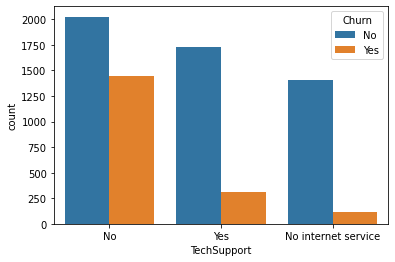

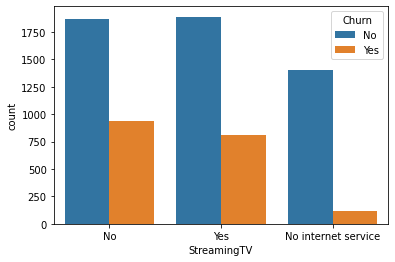

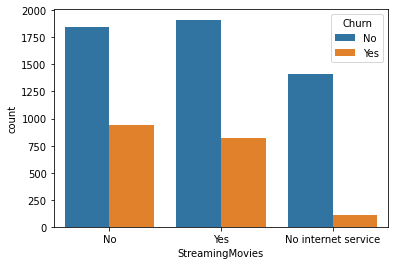

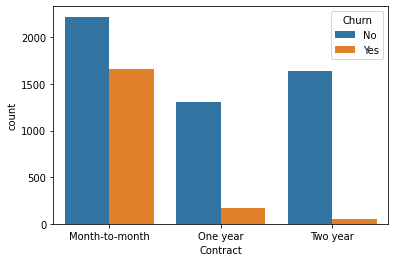

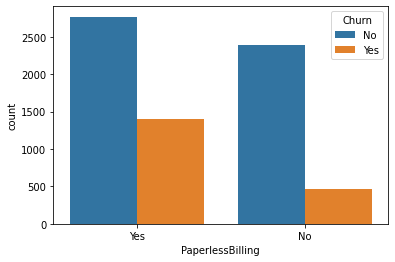

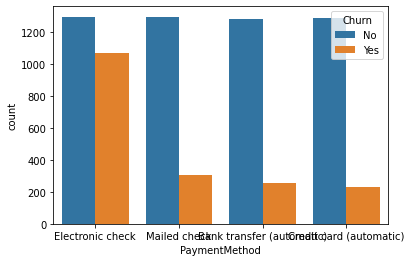

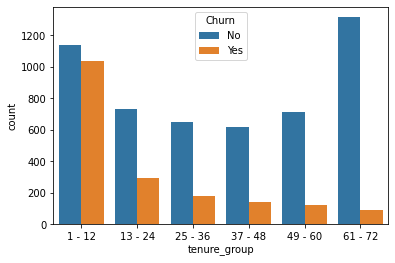

In [20]:
for i, predictor in enumerate(teleco_data.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=teleco_data, x = predictor, hue = 'Churn')

    Convert the target variable 'Churn' in a binary numeric variable i.e. Yes = 1, No = 0
    

In [21]:
teleco_data['Churn'] = np.where(teleco_data.Churn == 'Yes',1,0)

In [22]:
teleco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Now converting all categorical variable into dummy variables

In [23]:
teleco_data_dummies = pd.get_dummies(teleco_data)
teleco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Now, Lets see relationship between Monthly Charges and Total Charges

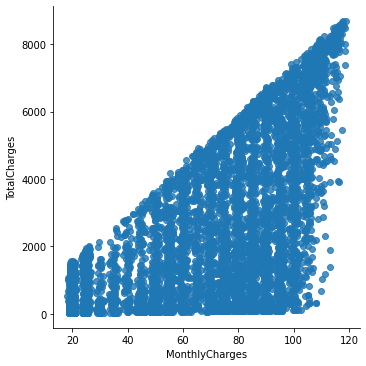

In [24]:
sns.lmplot(data = teleco_data_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

So monthly charges and total charges are higly correlated, Now lets check their relationship with churn

Text(0.5, 1.0, 'Monthly charges by churn')

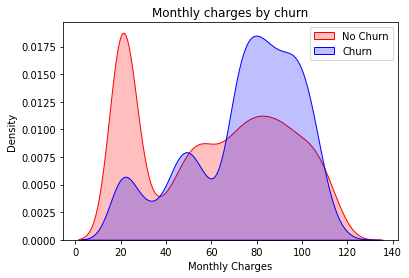

In [25]:
Mth = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies["Churn"] == 0)], color ="Red", shade = True)
Mth = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies["Churn"] == 1)], color ="Blue", shade = True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

* Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

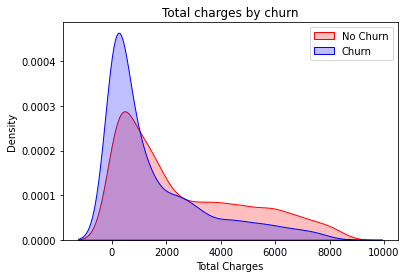

In [26]:
Mth = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 0)], color ="Red", shade = True)
Mth = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 1)], color ="Blue", shade = True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

We got a surprising insight that when higher total charges than lower churn but this can be correctly interpretted when we combine the insights of three parameters that are - Tenure, monthly charges and total charges that if for less tenure, monthly charges are high then then low total charge but churn is high but when for high tenure there are less monthly charge than high total charge but tenure is low.

<AxesSubplot:>

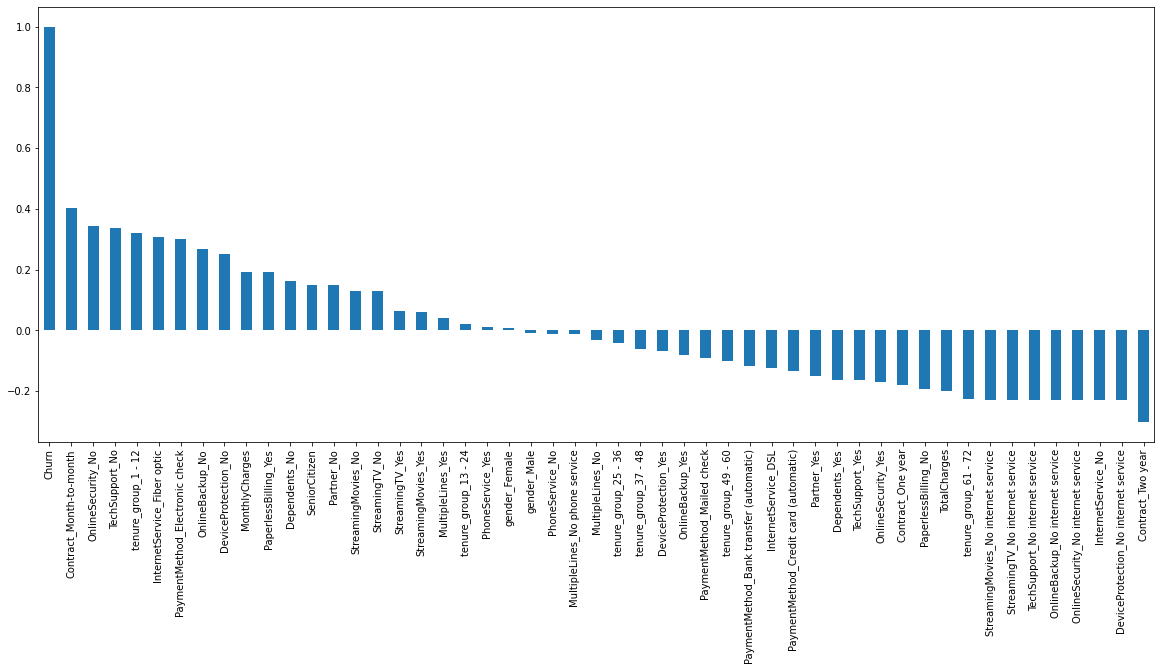

In [27]:
plt.figure(figsize = (20,8))
teleco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

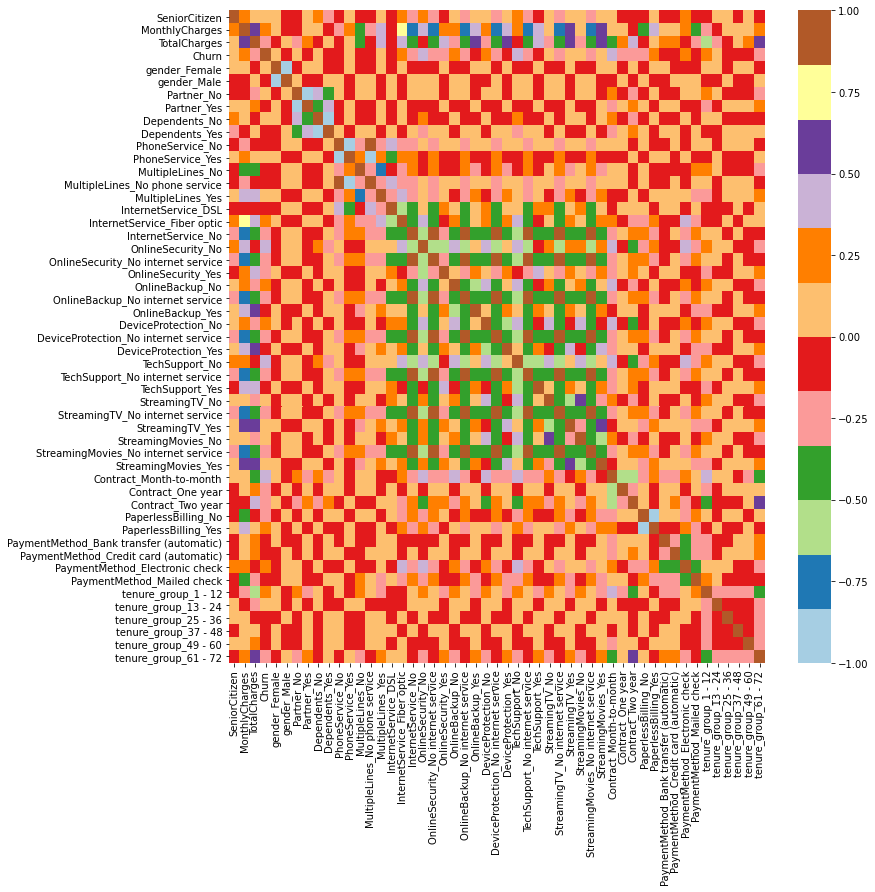

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(teleco_data_dummies.corr(), cmap = 'Paired')

### Bivariate Analysis

In [29]:
new_df1_target0 = teleco_data.loc[teleco_data["Churn"]==0]
new_df1_target1 = teleco_data.loc[teleco_data["Churn"]==1]

In [30]:
def uniplot(df, col, title, hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order  = df[col].value_counts().index, hue = hue, palette = 'bright')
    
    plt.show()

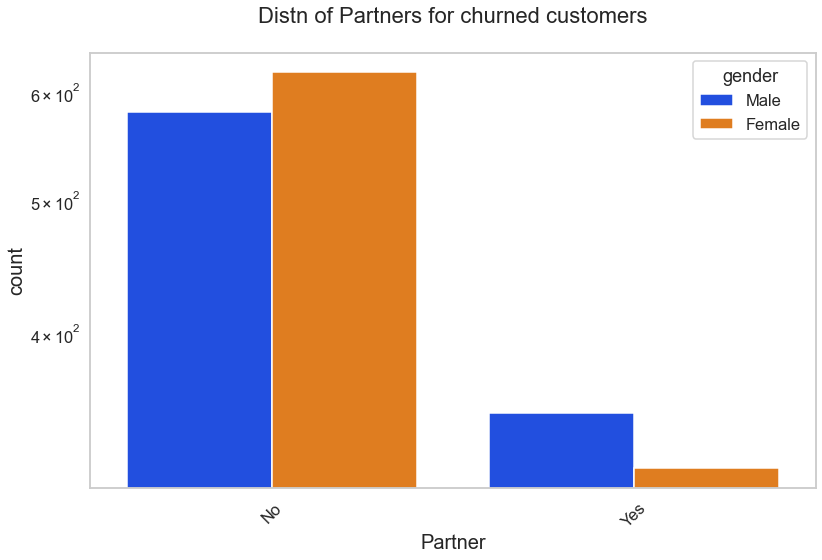

In [31]:
uniplot(new_df1_target1, col = 'Partner', title = 'Distn of Partners for churned customers', hue = 'gender')

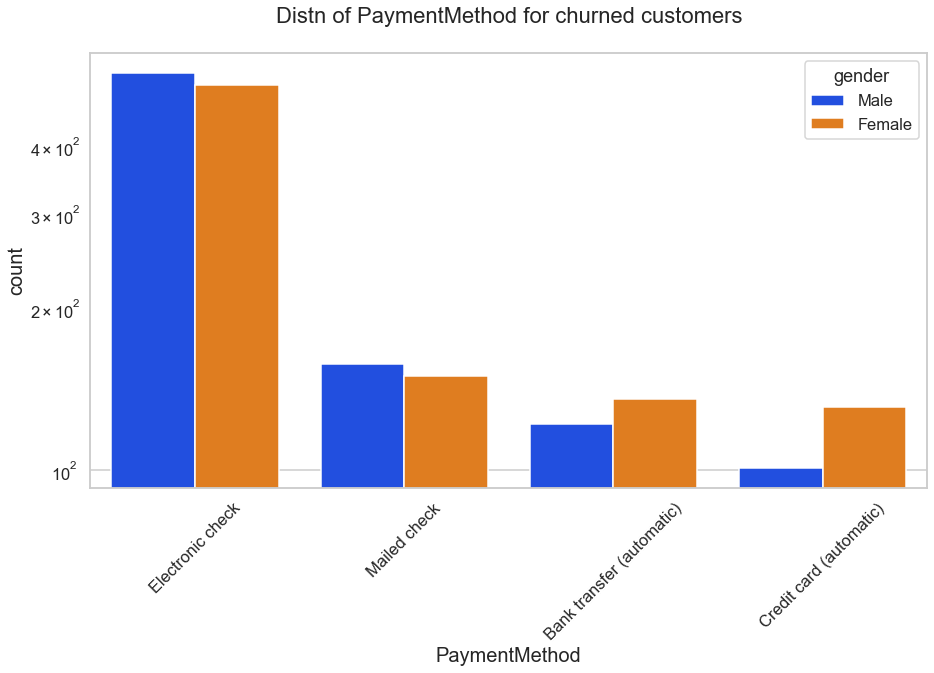

In [32]:
uniplot(new_df1_target1, col = 'PaymentMethod', title = 'Distn of PaymentMethod for churned customers', hue = 'gender')

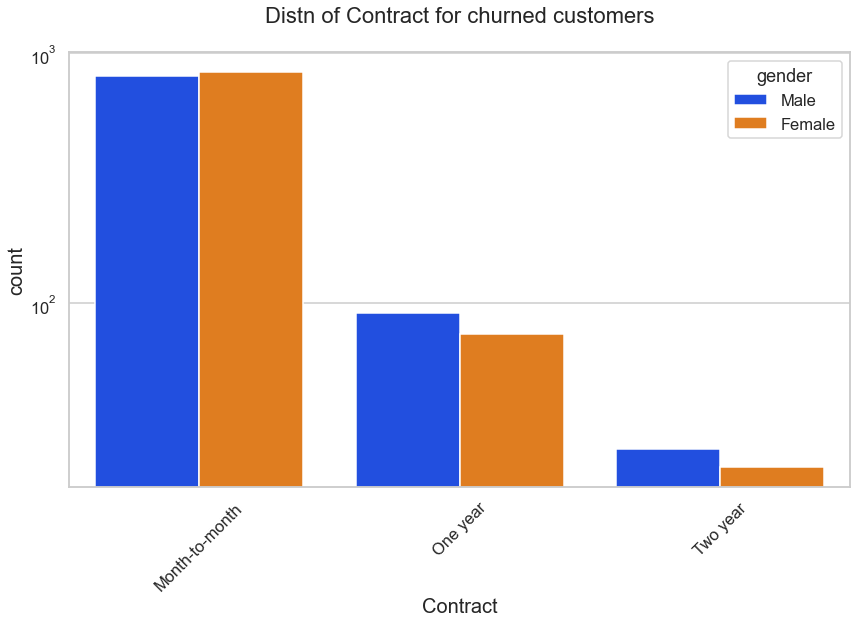

In [33]:
uniplot(new_df1_target1, col = 'Contract', title = 'Distn of Contract for churned customers', hue = 'gender')

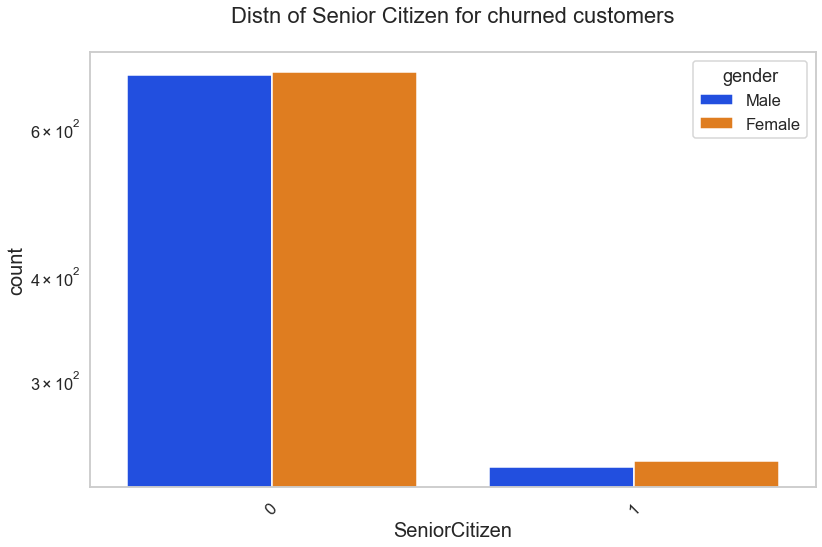

In [34]:
uniplot(new_df1_target1, col = 'SeniorCitizen', title = 'Distn of Senior Citizen for churned customers', hue = 'gender')

### Conclusion

* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn as no contract terms
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

In [35]:
teleco_data_dummies.to_csv('tel_churn.csv')